In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [107]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

As we can see, there are null values we should treat. Let's create a function to see what percentage of the data in each column is null

In [150]:
def getMissingData(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    print(missing_data.head(20))

Before deleting any columns with too much missing data, we should check the data description (data_description.txt) to see what the null values means. For example, for the PoolQC variable, NA means "no pool", not "no data". This is extremely important to know, since not having a pool seems like a significant feature that influences the sale price. Let's check this for the other variables

PoolQC -> NA = no pool

MiscFeature -> NA = None (no miscellaneous)

Alley -> NA = no alley access

Fence -> NA = no fence

FireplaceQu -> NA = no fireplace 

LotFrontage -> NA = NA*

GarageYrBlt -> NA = NA*

GarageCond -> NA = no garage

GarageType -> NA = no garage

GarageFinish -> NA = no garage

GarageQual -> NA = no garage

BsmtFinType2 -> NA = no basement

BsmtExposure -> NA = no basement

BsmtQual -> NA = no basement

BsmtCond -> NA = no basement

BsmtFinType1 -> NA = no basement

MasVnrArea -> NA = NA*

MasVnrType -> NA = NA*

Electrical -> NA = NA*


*For these variables, the missing data can actually be considered missing data. As for the rest, it simply indicates that the house is missing that feature!


So let's deal with these NA values variable by variable

In [109]:
unwanted_columns = []

### PoolArea

In [110]:
df_train['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

We can see how there's only 7 houses with relevant info about the pool area. This variable clearly will tell us nothing.

In [111]:
unwanted_columns.append('PoolArea')

### PoolQC, MiscFeature, Alley and Fence

For all these variables, even though the NA values aren't actually null data (they mean the house doesn't have that particular feature), since the huge majority don't have those features, our model may not learn very much about their role in house pricing. That said, we can drop them

In [112]:
unwanted_columns.append('PoolQC')
unwanted_columns.append('MiscFeature')
unwanted_columns.append('Alley')
unwanted_columns.append('Fence')

### FireplaceQu

In [118]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('NoFireplace')

In [119]:
df_train['FireplaceQu']

0       NoFireplace
1                TA
2                TA
3                Gd
4                TA
           ...     
1455             TA
1456             TA
1457             Gd
1458    NoFireplace
1459    NoFireplace
Name: FireplaceQu, Length: 1460, dtype: object

In [151]:
getMissingData(df_train)

              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
GarageFinish     81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageQual       81  0.055479
GarageCond       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrType        8  0.005479
Electrical        1  0.000685
BedroomAbvGr      0  0.000000
KitchenAbvGr      0  0.000000
Fireplaces        0  0.000000
KitchenQual       0  0.000000


### LotFrontage

Since "LotFrontage" is numerical, and 17.7% of the data is missing, the approach I'll use is to fill the NaN values with the median

In [129]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())

### GarageYrBlt

Looking at the correlation matrix, GarageYrBlt and YearBlt are quite well correlated. I will choose to drop this column entirely.

<AxesSubplot:>

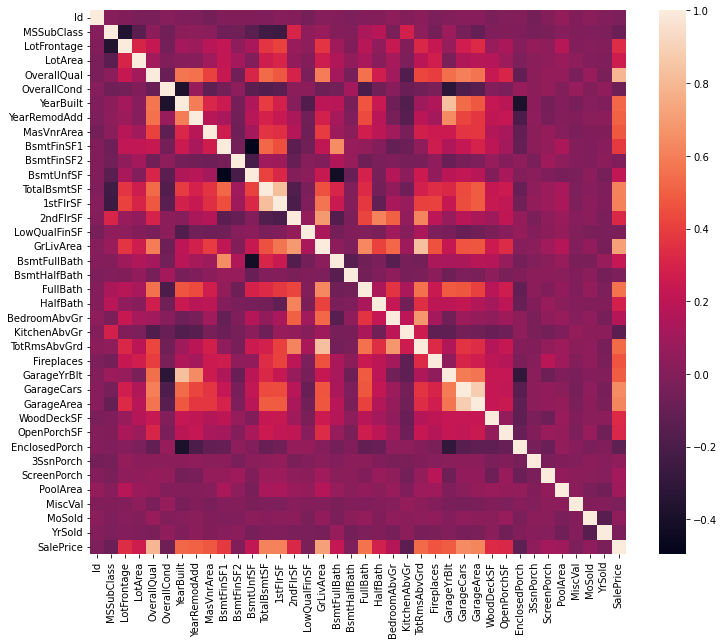

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_train.corr()
plt.figure(figsize=[12, 10])
sns.heatmap(corr_matrix)

In [132]:
unwanted_columns.append('GarageYrBlt')

### MasVnrArea

Here, there're only 8 missing values. I'll fill in these in with the mean, since the values vary a lot and the median in this case is 0.00, while the mean is 103.68

In [138]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

### MasVnrType

There are also only 8 missing values here, but since this variable is categorical I'll choose to simply delete these 8 lines

In [152]:
df_train['MasVnrType'] = df_train['MasVnrType'].dropna()

### Electrical

There is only 1 missing value, but since this variable is categorical I'll also choose to delete the line

In [153]:
df_train['Electrical'] = df_train['Electrical'].dropna()

### Now droping the unwanted columns

In [154]:
df_train = df_train.drop(columns=unwanted_columns)

In [155]:
getMissingData(df_train)

              Total   Percent
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
GarageCond       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrType        8  0.005479
Electrical        1  0.000685
BsmtHalfBath      0  0.000000
KitchenQual       0  0.000000
FullBath          0  0.000000
BsmtFullBath      0  0.000000
GrLivArea         0  0.000000
HalfBath          0  0.000000
BedroomAbvGr      0  0.000000
LowQualFinSF      0  0.000000
2ndFlrSF          0  0.000000
